# Load Data Set

In [1]:
# Import TensorFlow and load the MNIST dataset
from tensorflow.keras.datasets import mnist

# Load data into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print confirmation
print("✅ MNIST dataset loaded successfully!")
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
✅ MNIST dataset loaded successfully!
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


# Check Dataset Shapes & Basic Info

In [3]:
# Check the shapes of training and testing data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
# Check a single image
print("\nExample image pixel values (first image):")
print(x_train[0])  # Pixel intensity values


Example image pixel values (first image):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0

In [5]:
print("\nLabel for the first image:", y_train[0])


Label for the first image: 5


# Visualize Sample Images

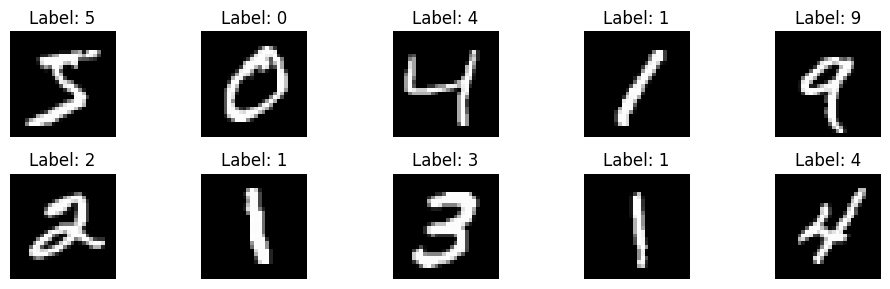

In [6]:
import matplotlib.pyplot as plt

# Plot 10 sample images from training data
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Understand Train/Test Split

In [7]:
# Confirm counts of training and testing images
print("Number of training samples:", len(x_train))
print("Number of testing samples:", len(x_test))

# Example difference
print("\nExample of a training label:", y_train[0])
print("Example of a test label:", y_test[0])

Number of training samples: 60000
Number of testing samples: 10000

Example of a training label: 5
Example of a test label: 7


# Normalize image pixel values

#CNNs perform better when inputs are small and consistent — large raw values can cause unstable training. A consistent smaller range (0–1) makes it easier for the model to “understand” patterns evenly.

In [8]:
import numpy as np

In [10]:
# Normalize pixel values to range 0–1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Confirm normalization
print("After normalization:")
print("Min pixel value:", np.min(x_train))
print("Max pixel value:", np.max(x_train))

After normalization:
Min pixel value: 0.0
Max pixel value: 1.0


# Reshape images to match CNN input

In [11]:
# Reshape images to include channel dimension (for CNN input)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Confirm new shapes
print("New training data shape:", x_train.shape)
print("New testing data shape:", x_test.shape)

New training data shape: (60000, 28, 28, 1)
New testing data shape: (10000, 28, 28, 1)


# Convert labels to one-hot encoding

In [12]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Check the result
print("Example one-hot encoded label (for digit 5):")
print(y_train[5])
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Example one-hot encoded label (for digit 5):
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Shape of y_train: (60000, 10)
Shape of y_test: (10000, 10)


# CNN for MNIST Digit Classification

In [13]:
from tensorflow.keras import datasets, layers, models

#Load and Prepare the Data

In [14]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Reshape and normalize the data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


# Build the CNN Model

In [21]:
# Initialize the model
model = models.Sequential()

In [22]:
#  First Convolution Layer
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

In [23]:
#  First Pooling Layer
model.add(layers.MaxPooling2D((2,2)))

In [24]:
#  Add another Conv + Pool layer
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [25]:
# 📏 Flatten the 2D output to 1D
model.add(layers.Flatten())

In [26]:

#  Add Dense (Fully Connected) Layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

# Compile and Train the model

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9539 - loss: 0.1489 - val_accuracy: 0.9835 - val_loss: 0.0523
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9856 - loss: 0.0487 - val_accuracy: 0.9860 - val_loss: 0.0414
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9889 - loss: 0.0342 - val_accuracy: 0.9823 - val_loss: 0.0517
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9916 - loss: 0.0261 - val_accuracy: 0.9886 - val_loss: 0.0333
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9940 - loss: 0.0192 - val_accuracy: 0.9869 - val_loss: 0.0400


In [30]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9869 - loss: 0.0400

Test accuracy: 0.9868999719619751


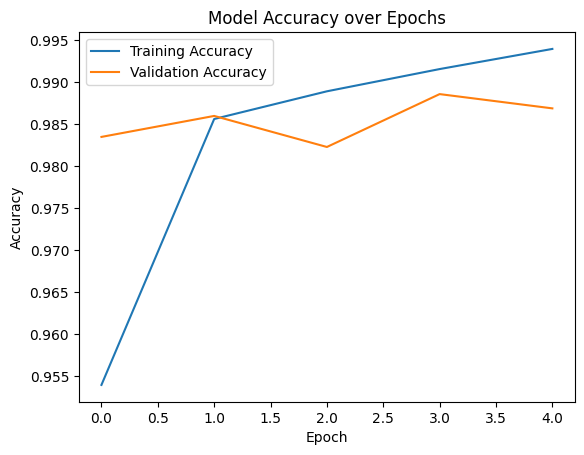

In [31]:
# Vizualizing the model
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()